In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

q1

In [78]:
w = np.array([[1,2,1],[2,4,2],[1,2,1]])

In [79]:
x = np.array([0,1,2])
y=x

In [80]:
X, Y = np.meshgrid(x,y)
X,Y

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]))

/tmp/ipykernel_13946/2858058420.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


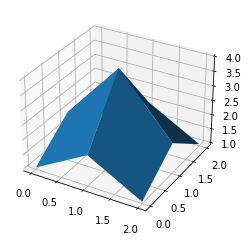

In [81]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(X, Y, w)

plt.show()

In [82]:
x_new = np.linspace(0,2,30)
y_new = np.linspace(0,2,30)

X_new, Y_new = np.meshgrid(x_new, y_new)

func = interp2d(x,y,w, kind='linear')




In [83]:
z_new = f(x_new, y_new)

/tmp/ipykernel_13946/3854579669.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


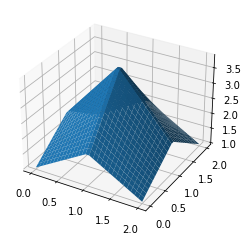

In [84]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(X_new, Y_new, z_new)

plt.show()

In [85]:
from scipy import ndimage

In [87]:
f = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,0,0,0]])

In [88]:
def imgconv(f,w):
    return ndimage.convolve(f,w, mode='constant', cval=0.0)

imgconv(f,w)

array([[0, 1, 2, 1, 0],
       [0, 3, 6, 3, 0],
       [0, 4, 8, 4, 0],
       [0, 3, 6, 3, 0],
       [0, 1, 2, 1, 0]])

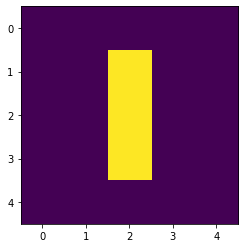

In [93]:

plt.imshow(f)

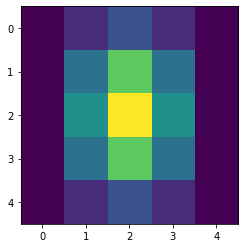

In [94]:
plt.imshow(imgconv(f,w))

q2

In [96]:
import skimage.io
import cv2

In [107]:
img = cv2.imread('house-downsampled.png')


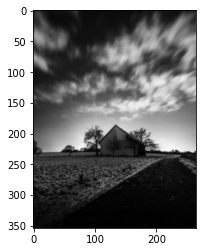

In [108]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [110]:
three_filter = np.ones((3,3))/9
five_filter = np.ones((5,5))/25
eleven_filter = np.ones((11,11))/121

In [111]:
im1 = cv2.filter2D(img, -1, three_filter)
im2 = cv2.filter2D(img, -1, five_filter)
im3 = cv2.filter2D(img, -1, eleven_filter)

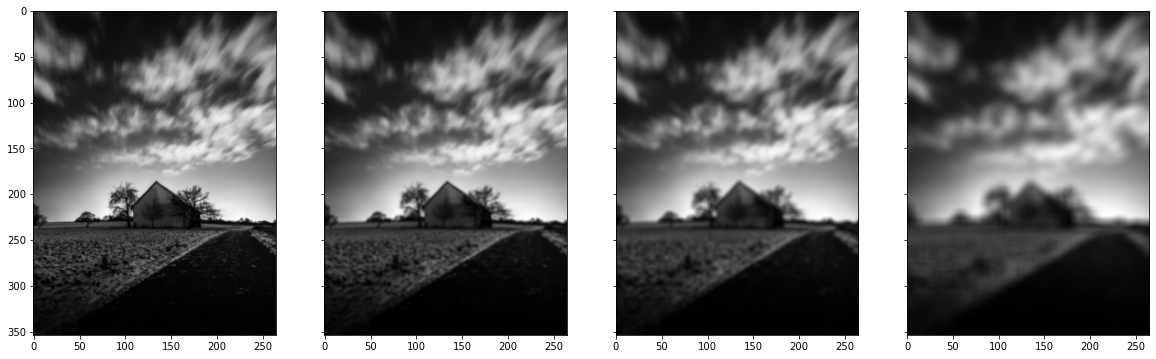

In [124]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey= True, figsize=(20,20))
ax1.imshow(img, cmap='gray')
ax2.imshow(im1, cmap='gray')
ax3.imshow(im2, cmap='gray')
ax4.imshow(im3, cmap='gray')

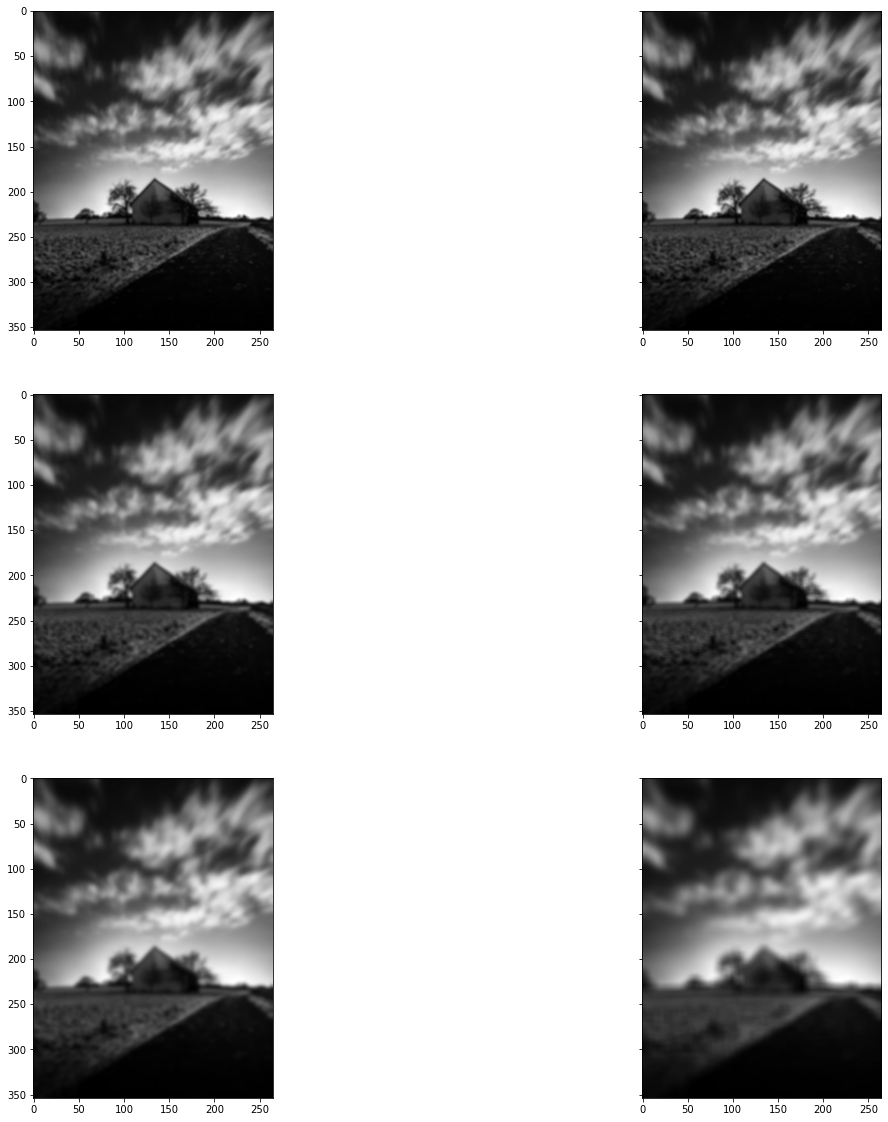

In [176]:
I_gaussian_blur1 = cv2.GaussianBlur(img,(3,3),2,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img,(3,3),7,cv2.BORDER_DEFAULT)
I_gaussian_blur3 = cv2.GaussianBlur(img,(5,5),2,cv2.BORDER_DEFAULT)
I_gaussian_blur4 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)
I_gaussian_blur5 = cv2.GaussianBlur(img,(11,11),2,cv2.BORDER_DEFAULT)
I_gaussian_blur6 = cv2.GaussianBlur(img,(11,11),7,cv2.BORDER_DEFAULT)

fig, axs = plt.subplots(3,2, figsize=(20,20), sharey=True)

#ax1.imshow(img, cmap='gray')
axs[0,0].imshow(I_gaussian_blur1, cmap='gray')
axs[0,1].imshow(I_gaussian_blur2, cmap='gray')
axs[1,0].imshow(I_gaussian_blur3, cmap='gray')
axs[1,1].imshow(I_gaussian_blur4, cmap='gray')
axs[2,0].imshow(I_gaussian_blur5, cmap='gray')
axs[2,1].imshow(I_gaussian_blur6, cmap='gray')



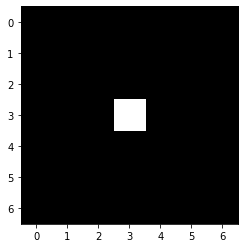

In [205]:
test = np.zeros((7,7))
test[3,3]=1
plt.imshow(test, cmap='gray')

In [209]:
blurred = cv2.GaussianBlur(test, (5,5),2)

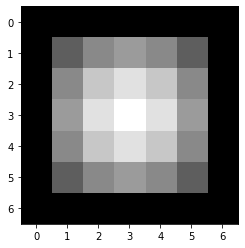

In [210]:
plt.imshow(blurred, cmap='gray')

In [211]:
x = np.array([0,1,2,3,4,5,6])
y=x

X,Y = np.meshgrid(x,y)

/tmp/ipykernel_13946/477032375.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


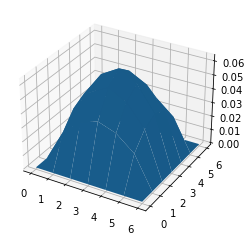

In [212]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(X, Y, blurred)

plt.show()

In [219]:
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)

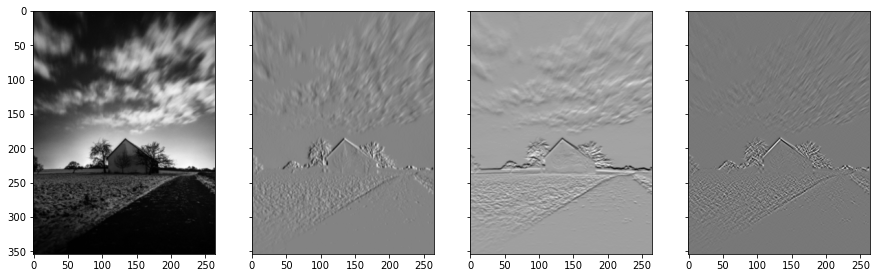

In [220]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15,15), sharey=True)
ax1.imshow(img, cmap='gray')
ax2.imshow(sobelx, cmap='gray')
ax3.imshow(sobely, cmap='gray')
ax4.imshow(sobelxy, cmap='gray')

In [227]:
orientation = np.arctan2(sobely,sobelx)

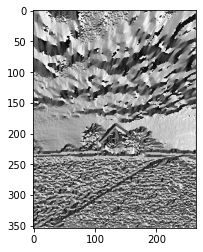

In [228]:
plt.imshow(orientation, cmap='gray')

In [230]:
r_Cross_x = np.array([[1,0],[0,-1]])
r_Cross_y = np.array([[0,1],[-1,0]])

In [248]:



vertical_edges = ndimage.convolve(img/255, r_Cross_x)
horizontal_edges = ndimage.convolve(img/255, r_Cross_y)

gradient_img = np.sqrt(np.square(vertical_edges) + np.square(horizontal_edges),dtype='float')

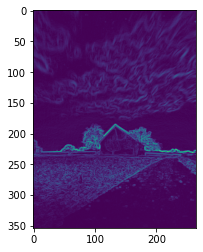

In [249]:
plt.imshow(gradient_img)

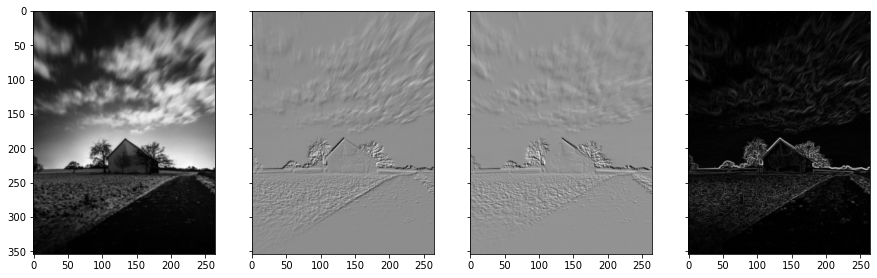

In [250]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,15),sharey=True)
ax1.imshow(img, cmap='gray')
ax2.imshow(vertical_edges, cmap='gray')
ax3.imshow(horizontal_edges, cmap='gray')
ax4.imshow(gradient_img, cmap='gray')

In [241]:
p_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
p_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

In [245]:



vertical_edges = ndimage.convolve(img/255, p_x)
horizontal_edges = ndimage.convolve(img/255, p_y)

gradient_img = np.sqrt(np.square(vertical_edges) + np.square(horizontal_edges),dtype='float')

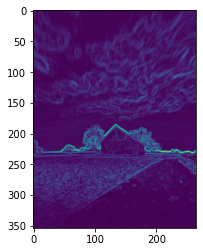

In [246]:
plt.imshow(gradient_img)

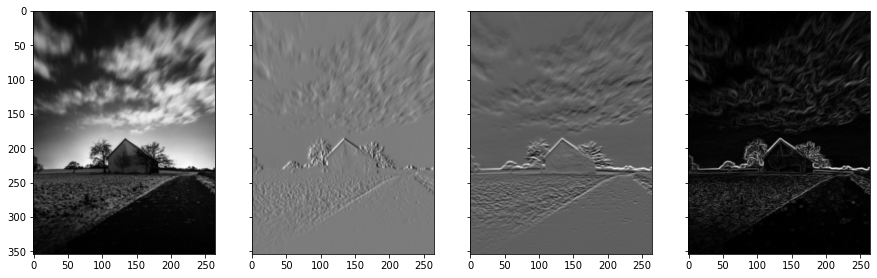

In [247]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,15),sharey=True)
ax1.imshow(img, cmap='gray')
ax2.imshow(vertical_edges, cmap='gray')
ax3.imshow(horizontal_edges, cmap='gray')
ax4.imshow(gradient_img, cmap='gray')

In [251]:
ddepth=cv2.CV_64F

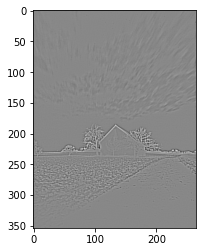

In [257]:
laplaced = cv2.Laplacian(img, ddepth, ksize=3)

plt.imshow(laplaced,cmap='gray')

In [296]:
tiger = cv2.imread('tiger_noise.jpeg')

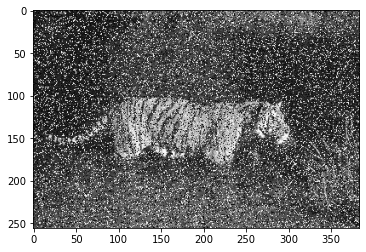

In [297]:
plt.imshow(tiger,cmap='gray')

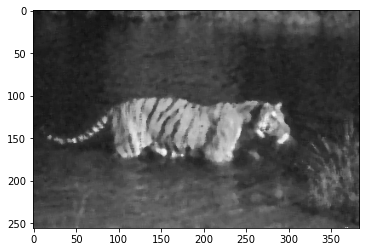

In [298]:
median_filtered = cv2.medianBlur(tiger,5)
plt.imshow(median_filtered, cmap='gray')

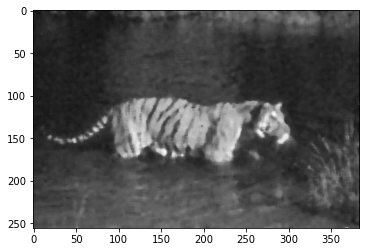

In [299]:
smoothened_tiger = cv2.GaussianBlur(median_filtered/255, (3,3),0.5,cv2.BORDER_DEFAULT)
plt.imshow(smoothened_tiger, cmap='gray')

In [311]:
x_grad = cv2.Sobel(smoothened_tiger, ddepth=ddepth, dx=1,dy=0,ksize=3)
y_grad = cv2.Sobel(smoothened_tiger, ddepth=ddepth, dx=0,dy=1,ksize=3)

mag_grad = np.sqrt(np.square(x_grad),np.square(y_grad))
orientation_tiger = np.arctan(y_grad/x_grad)


/tmp/ipykernel_13946/2352681526.py:5: RuntimeWarning: divide by zero encountered in true_divide
  orientation_tiger = np.arctan(y_grad/x_grad)
/tmp/ipykernel_13946/2352681526.py:5: RuntimeWarning: invalid value encountered in true_divide
  orientation_tiger = np.arctan(y_grad/x_grad)


In [312]:
laplacian_tiger = cv2.Laplacian(smoothened_tiger, ddepth=ddepth, ksize=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


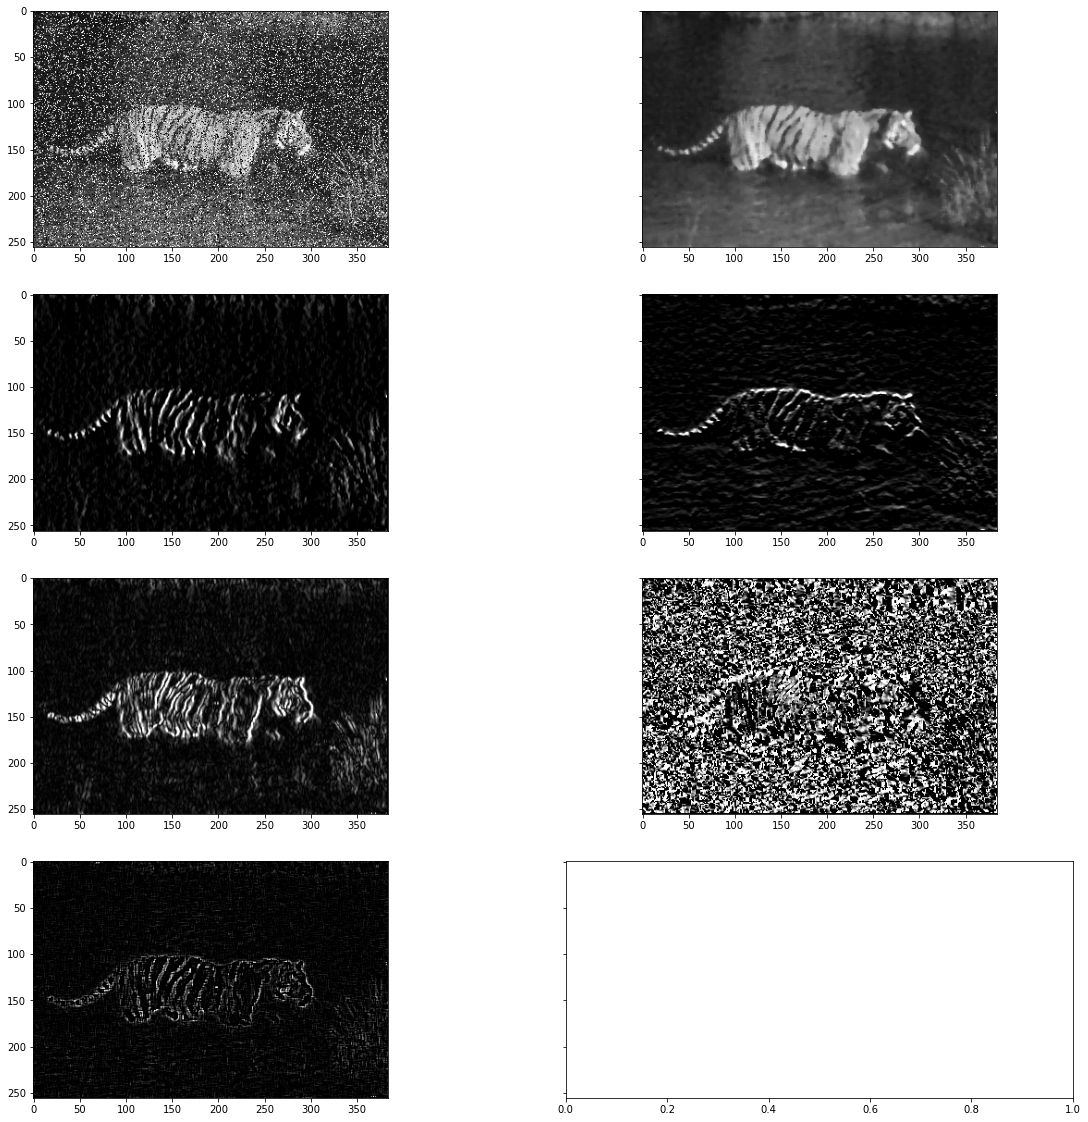

In [313]:
fig, axs = plt.subplots(4,2,sharey=True, figsize=(20,20))
axs[0,0].imshow(tiger, cmap='gray')
axs[0,1].imshow(smoothened_tiger, cmap='gray')
axs[1,0].imshow(smoothened_tiger, cmap='gray')
axs[1,0].imshow(x_grad, cmap='gray')
axs[1,1].imshow(y_grad, cmap='gray')
axs[2,0].imshow(mag_grad, cmap='gray')
axs[2,1].imshow(orientation_tiger, cmap='gray')
axs[3,0].imshow(laplacian_tiger, cmap='gray')